# Intro to Python 3: Data / Information Visualization in Python

*Why visualize data / information? What benefits does it offer us?*

Today, we will learn how to create some basic visualizations using Python. To stoke your imagination about what is possible, first review these two **Python visualization galleries**:

+ [Python Graph Gallery](https://www.python-graph-gallery.com/)
+ [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)

*Additional Resources*
+ Alberto Cairo, *The Truthful Art* (my favorite book on data visualization)
+ If you are interested in more qualitative data visualization approaches, fun examples are found in [Giorgia Lupi and Stefanie Posavec, *Dear Data*](http://www.dear-data.com/).
+ For beautiful, artistic renderings of data visualizations, I recommend looking at [Nadieh Bremer and Shirley Wu, *Data Sketches*](https://www.datasketch.es/).

...



## Dataset

Today, we will be working with a dataset of the passengers of the Titanic. 

If you do a Google search for "Titanic visualizations" you can find examples of how other people have created visualizations of this dataset. For one example, see: https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-1/. 

## Python Visualization Libraries / Packages

+ pandas (allows some basic visualization)
+ matplotlib
    + [tutorials](https://matplotlib.org/stable/tutorials/index.html)
+ seaborn
    + [tutorials](https://seaborn.pydata.org/tutorial.html)
    + [Elite Data Science - tutorials with Pokemon dataset](https://elitedatascience.com/python-seaborn-tutorial)
+ bokeh (for interactive visualization)
+ plotly (for interactive visualization)
+ plotnine (an adaptation of the popular R library, ggplot)
+ altair

In this lesson we will work with the two most popular data visualization libraries for Python:
+ [matplotlib]() - the most expansive data visualization library for Python
+ [seaborn]() - a visualization library built on top of matplotlib (so you will almost always have to import both).

Let's import these packages now. 

In [94]:
import pandas as pd
#import pathlib, glob
#from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
# note, for all three of the above - pd, plt, and sns are the commonly used abbreviations for these packages used by nearly everyone who uses them

1. To experiment with seaborn and matplotlib, seaborn offers a set of preloaded datasets. We can view what those are with the **get_dataset_names()** function. Since this is a seaborn function we need to add **sns.** before the name of this function:

```
sns.get_dataset_names()
```

In [95]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

2. We can load these datasets using **load_dataset([name of dataset])** function. Let's open the "titanic" dataset and preview it using the .head() method.

*Note: The layout of this dataset is conducive to visualization because it is arranged as a tidy dataset, meaning (among other things), there is one observation per row. In the case of this dataset, each observation (or row) represents a passenger and each column represents different attributes about each of these passengers.*

In [96]:
titanic = sns.load_dataset("titanic")
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


3. Seaborn makes it really easy to many different types of simple graphs from a dataframe. The common syntax is as follows:

```
sns.[type of plot]plot(data = dataset_name, x = "[column with x values]", y = "[column with y values]")
```

Often, however, there are multiple ways to create the same type of plot. For example, if you wanted to create a bar plot or graph showing the average fare (y) for passengers in each class (x) you could run the following:

<AxesSubplot:xlabel='pclass', ylabel='fare'>

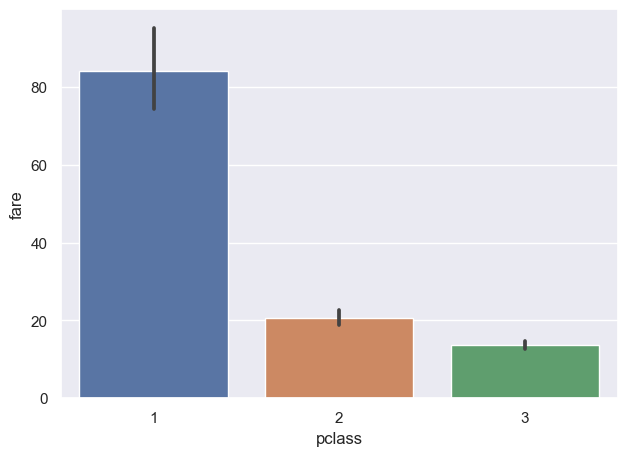

In [97]:
sns.barplot(data = titanic, x = "pclass", y = "fare")

3b. However, if you just want to create a bar plot of the total number of passengers in a given category, you would want to use countplot instead:

<AxesSubplot:xlabel='survived', ylabel='count'>

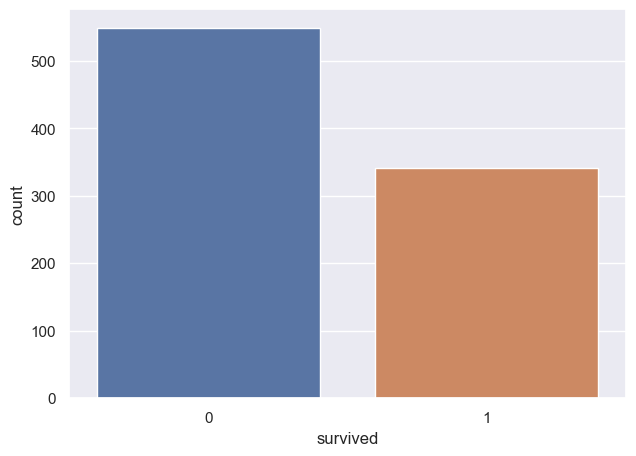

In [98]:
sns.countplot(data = titanic, x = "survived")

There are many other types of plots available with Seaborn. See the lefthand menu of the [Seaborn webpage](https://seaborn.pydata.org/generated/seaborn.boxplot.html) for the names of these plot types.

4a. Create a **scatterplot** setting the age and fare of each passenger as your x and y variables. 

<AxesSubplot:xlabel='age', ylabel='fare'>

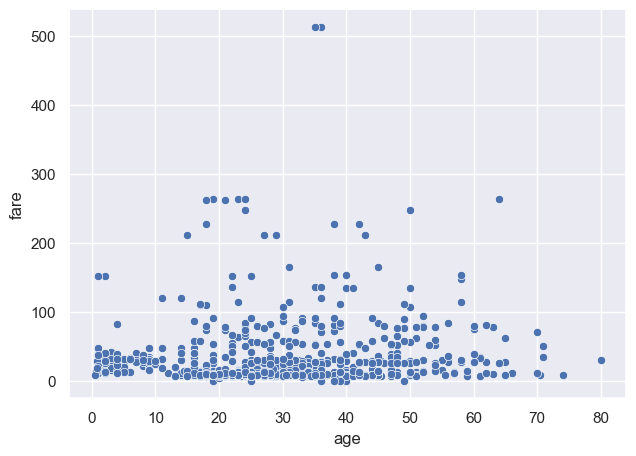

In [99]:
sns.scatterplot(data = titanic, x = "age", y = "fare")

4b. Copy and paste the same code as above (4a), but this time assigning the "survived" column to the hue variable:

<AxesSubplot:xlabel='age', ylabel='fare'>

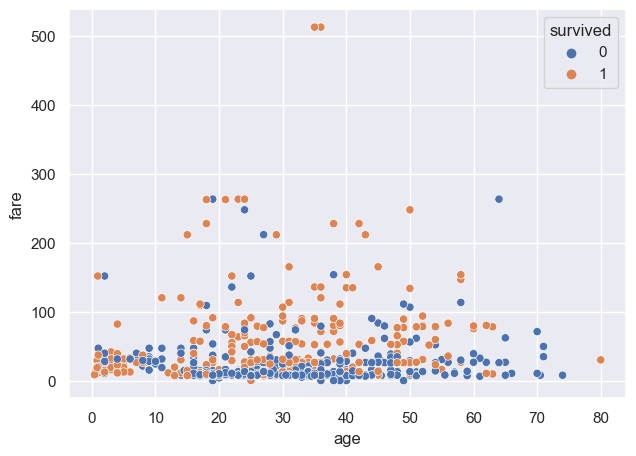

In [100]:
sns.scatterplot(data = titanic, x = "age", y = "fare", hue = 'survived')

4c. Now try choosing other categories for the hue variable. What data types should you choose for this variable: continuous numbers, ordinal numbers, or categorical data?

5. Create a **jointplot** setting the age and fare of each passenger as your x and y variables. What is a jointplot? Let's find out....

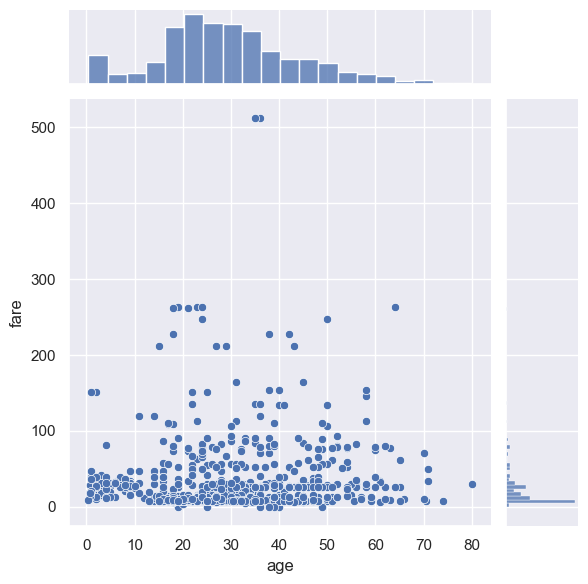

In [101]:
sns.jointplot(data = titanic, x = "age", y = "fare")

5b. Use color (in this case "hue") to examine this same data by "sex", "pclass", and "survived":

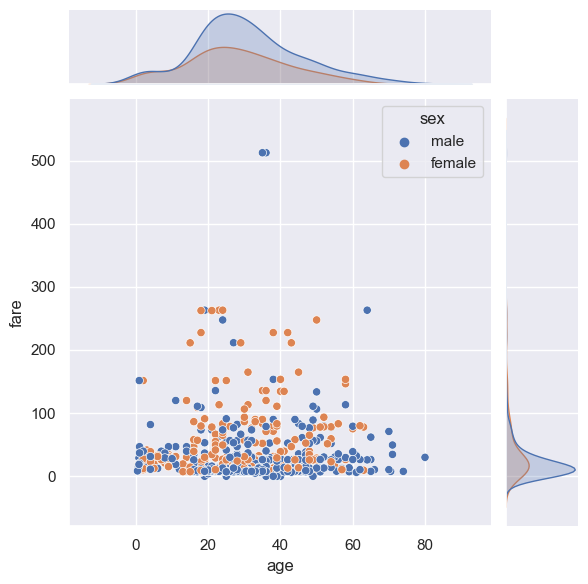

In [102]:
g = sns.jointplot(data = titanic, x = "age", y = "fare", hue = "sex")

[(0.0, 300.0)]

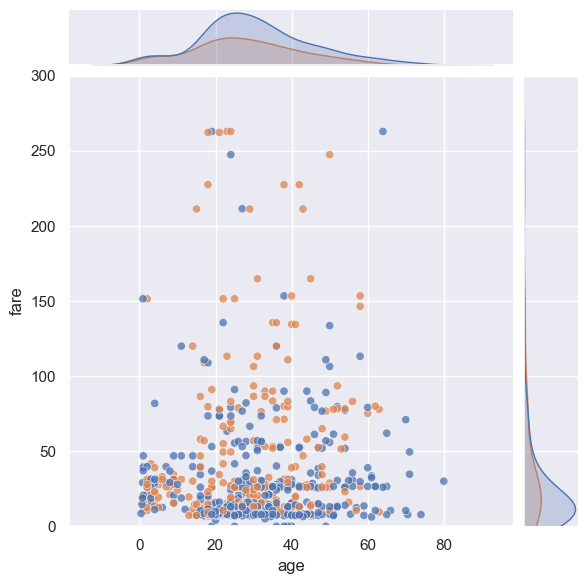

In [103]:
#sns.set(style="darkgrid")
g = sns.jointplot(data = titanic, x = "age", y = "fare", hue = "sex", ratio = 7, legend = False)
g.ax_joint.cla()

g = sns.scatterplot(data = titanic, x = "age", y = "fare", hue = "sex", alpha = 3/4, ax = g.ax_joint, legend = False)
g.set(ylim = (0, 300))
#plt.yscale('symlog')

In [104]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


6. Create a **boxplot** to identify the distribution of this data by age and passenger class.

<AxesSubplot:xlabel='pclass', ylabel='age'>

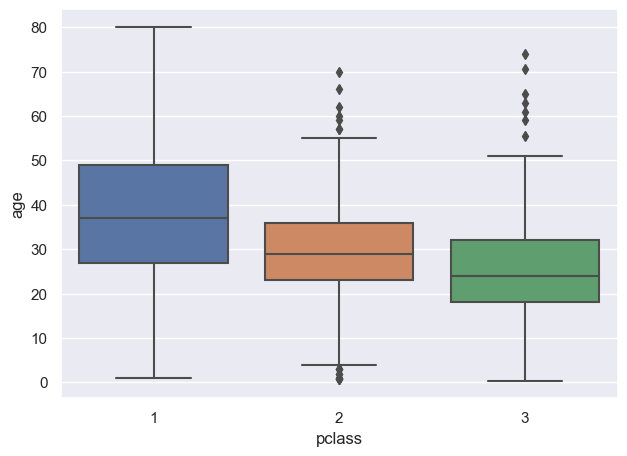

In [105]:
sns.boxplot(data = titanic, x = 'pclass', y = 'age')

7. Now experiment with creating a violinplot, stripplot, and swarmplot using this same data. Then try adding an additional column using the "hue" variable. 

<AxesSubplot:xlabel='sex', ylabel='age'>

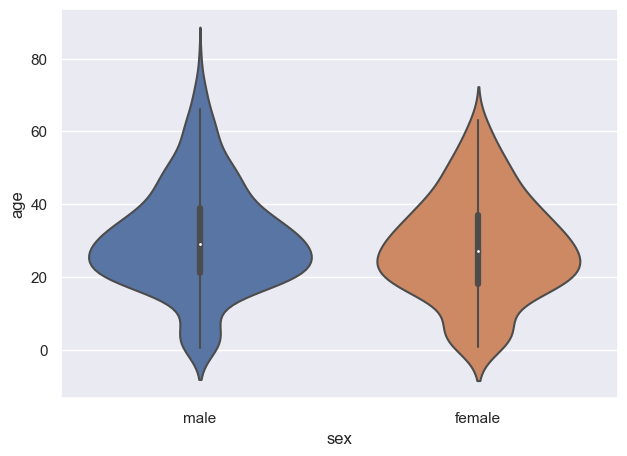

In [106]:
sns.violinplot(data = titanic, x = 'sex', y = 'age')

<AxesSubplot:xlabel='sex', ylabel='age'>

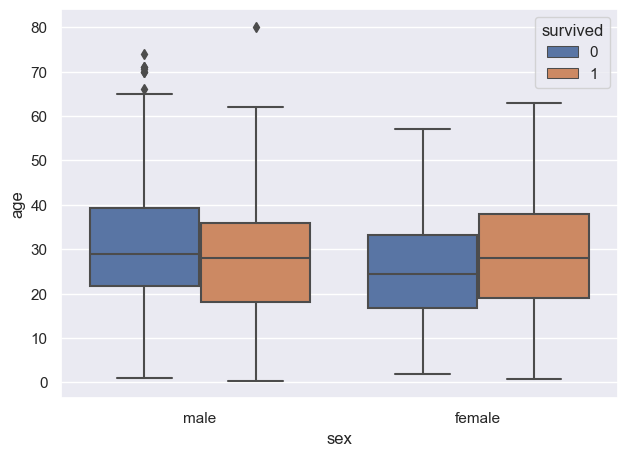

In [107]:
sns.boxplot(data = titanic, x = 'sex', y = 'age', hue = 'survived')

<AxesSubplot:xlabel='sex', ylabel='age'>

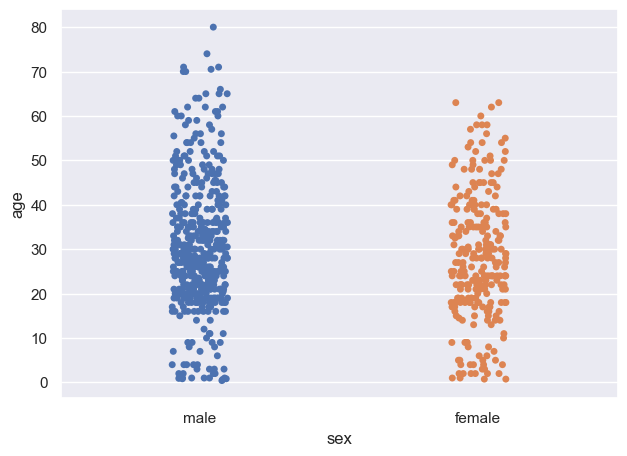

In [108]:
sns.stripplot(x='sex', y='age', data=titanic) #, hue='survived', jitter=True, dodge = True, )

8. You can further customize the look of these plots by using a pre-set stylesheet. 

Review:
[Matplotlib style sheets](https://www.python-graph-gallery.com/199-matplotlib-style-sheets)

To see a full list of available matplotlib style sheets, run:

In [109]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

8b. We can apply one of these style sheets by simply adding

```
plt.style.use([name of style sheet])
```

Run the code below, then try replacing the 'fivethirtyeight' stylesheet with others. Which one do you like the best?

*Note: you can also create and customize your own stylesheet, but that is beyond the scope of this lesson*

<AxesSubplot:xlabel='sex', ylabel='age'>

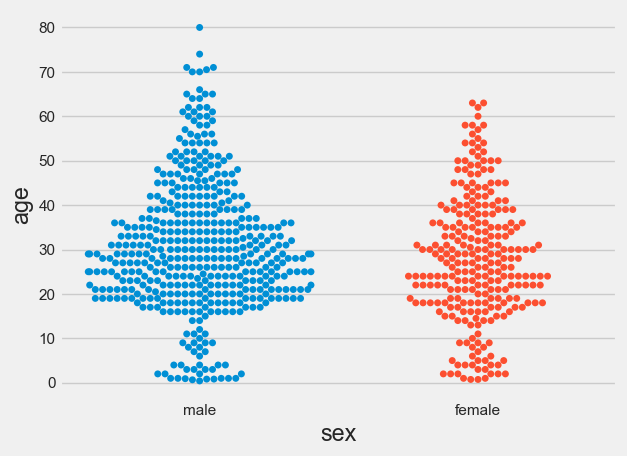

In [110]:
plt.style.use('fivethirtyeight')
sns.swarmplot(x='sex', y='age', data=titanic)#, hue = 'class' / 'survived')

## II. Correlation

9. You can also use visualizations to help you see the relationship between different variables. For example, how do you suppose a passenger's age, "sex", passenger class correlated to their chances of surviving the Titanic disaster. We can use seaborn's **lmplot** to plot regression models. Try running the code below (and feel free to add a stylesheet of your choosing):

c:\Users\F0040RP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


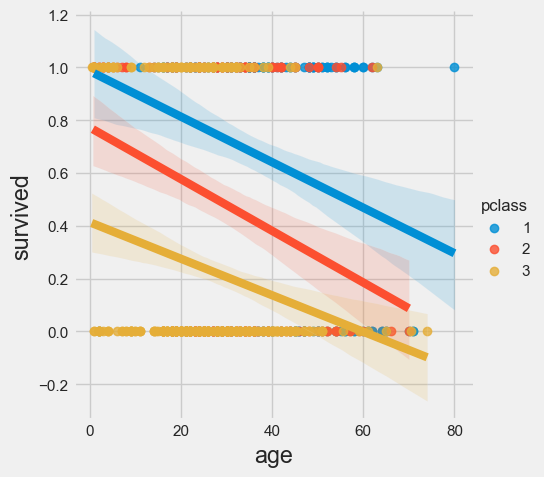

In [111]:

sns.lmplot('age', 'survived', data=titanic, hue='pclass')

9b. Now, replace passenger class with "sex."

c:\Users\F0040RP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


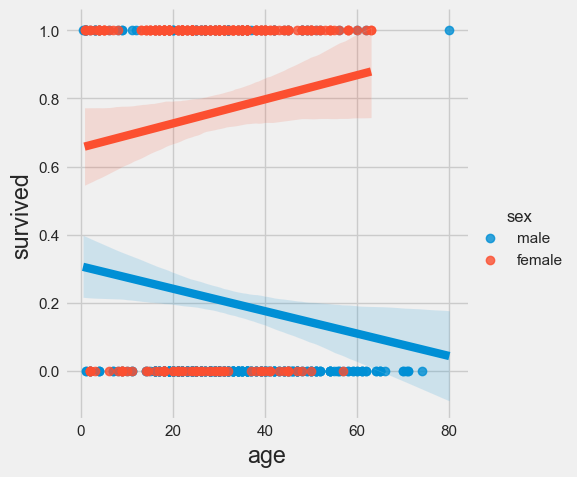

In [112]:
sns.lmplot('age', 'survived', data=titanic, hue='sex')

10. We can also create a heat map showing which variables most closely correlate with a passenger's survival. This requires some modification of our data, however, so we won't do that here. But to learn how to create such a heatmap, see: https://www.eamonfleming.com/projects/titanic.html.